In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

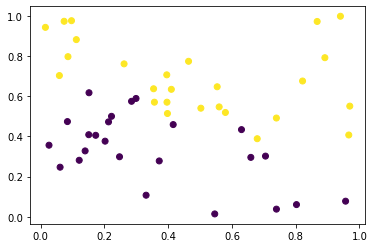

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def datagen(n):
    X = np.random.rand(n,2)
    y = np.where(-.5* X[:,0] + .75 > X[:,1], -1, 1)
    d = abs((.5 * X[:,0] + X[:,1] -.75)) / (math.sqrt(.5 * .5 + 1 * 1))
    r = np.exp(-(d*d)/(2*0.05*0.05))
    z = np.random.binomial(n=1, p=r/2)
    y[z==1] = -y[z==1]
    y = np.where(y==-1, 0, 1)
    return X, y

X, y = datagen(50)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [35]:
X_plus = np.hstack((X, np.ones((50, 1))))
print(X_plus.shape)
print(X_plus)

t = np.array([1,2,3])

print(X_plus@t)

(50, 3)
[[0.89164349 0.79130845 1.        ]
 [0.67935535 0.38864078 1.        ]
 [0.46388021 0.77341264 1.        ]
 [0.28498911 0.57453809 1.        ]
 [0.5794895  0.51905231 1.        ]
 [0.55370094 0.64678854 1.        ]
 [0.02601054 0.35635988 1.        ]
 [0.39552308 0.70612681 1.        ]
 [0.65929348 0.29583053 1.        ]
 [0.29906878 0.58871603 1.        ]
 [0.212796   0.47231652 1.        ]
 [0.73961661 0.0385769  1.        ]
 [0.94041119 0.99734597 1.        ]
 [0.40987595 0.63409425 1.        ]
 [0.95661201 0.07811397 1.        ]
 [0.39767312 0.51392366 1.        ]
 [0.37188493 0.27815822 1.        ]
 [0.05855995 0.7025233  1.        ]
 [0.13934542 0.32798562 1.        ]
 [0.24728339 0.29885362 1.        ]
 [0.17249981 0.4055559  1.        ]
 [0.07348599 0.9723511  1.        ]
 [0.06081846 0.24706494 1.        ]
 [0.73949733 0.49138292 1.        ]
 [0.39616596 0.57012741 1.        ]
 [0.8674278  0.9714211  1.        ]
 [0.41568895 0.45886908 1.        ]
 [0.08380262 0.47377

In [26]:
theta = np.array([1, -1, 0])
thetas = np.array([theta])
learning_rate = 0.02
errors = []

while True:
    pred = sigmoid(X_plus@theta.T)
    err = pred - y
    g = X_plus@err
    theta = theta - learning_rate*g
    thetas = np.vstack((thetas, theta))
    if np.array_equal(thetas[len(thetas) - 2], theta):
        break
    
print(thetas.shape)
print(thetas)

fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.gca(projection='3d')
ax1.plot(thetas[:,0], thetas[:,1], thetas[:,2], '-o')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 300 is different from 3)